# 0.0 Imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.cluster import KMeans, AffinityPropagation
from sklearn.metrics import silhouette_score

## 0.1 Helper Functions

In [2]:
from src.helpers import update_dataframe

## 0.2 Load Dataset

In [3]:
df = pd.read_csv('data/clusterizacao/X_dataset.csv')
df.head()

alcohol  malic_acid       ash  ash_alcanity  magnesium  total_phenols  \
0  1.518613    0.191700  0.232053     -1.169593   1.913905       0.627586   
1  0.246290    0.205534 -0.827996     -2.490847   0.018145       0.575862   
2  0.196879    0.320158  1.109334     -0.268738   0.088358       0.627586   
3  1.691550    0.239130  0.487926     -0.809251   0.930918       0.989655   
4  0.295700    0.365613  1.840403      0.451946   1.281985       0.627586   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity  \
0    0.573840             -0.659563         1.224884         0.251717   
1    0.510549             -0.820719        -0.544721        -0.293321   
2    0.611814             -0.498407         2.135968         0.269020   
3    0.664557             -0.981875         1.032155         1.186068   
4    0.495781              0.226796         0.401404        -0.319276   

        hue     od280   proline  
0  0.455285  0.970696  0.561341  
1  0.463415  0.780220  0.550642  
2  0.447154  0.695971  0.646933  
3  0.308943  0.798535  0.857347  
4  0.455285  0.608059  0.325963

In [4]:
# esse dataset contém 178 registros e 13 features
df.shape

(178, 13)

In [5]:
df.columns

Index(['alcohol', 'malic_acid', 'ash', 'ash_alcanity', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue', 'od280', 'proline'],
      dtype='object')

Como de costume vamos checar se há valores nulos e se todas as features são numéricas.

In [6]:
# não há valores nulos nesse conjunto de dados
df.isna().sum(axis=0)

alcohol                 0
malic_acid              0
ash                     0
ash_alcanity            0
magnesium               0
total_phenols           0
flavanoids              0
nonflavanoid_phenols    0
proanthocyanins         0
color_intensity         0
hue                     0
od280                   0
proline                 0
dtype: int64

In [7]:
# todos os dados são do tipo float
df.dtypes

alcohol                 float64
malic_acid              float64
ash                     float64
ash_alcanity            float64
magnesium               float64
total_phenols           float64
flavanoids              float64
nonflavanoid_phenols    float64
proanthocyanins         float64
color_intensity         float64
hue                     float64
od280                   float64
proline                 float64
dtype: object

Após essa breve inspeção, podemos dar prosseguimento ao treinamento dos algoritmos.

In [8]:
X = df.values
X

array([[ 1.51861254,  0.1916996 ,  0.23205254, ...,  0.45528455,
         0.97069597,  0.56134094],
       [ 0.24628963,  0.2055336 , -0.82799632, ...,  0.46341463,
         0.78021978,  0.55064194],
       [ 0.19687903,  0.3201581 ,  1.10933436, ...,  0.44715447,
         0.6959707 ,  0.64693295],
       ...,
       [ 0.33275817,  0.69960474, -0.38935541, ...,  0.08943089,
         0.10622711,  0.39728959],
       [ 0.20923168,  0.36561265,  0.01273209, ...,  0.09756098,
         0.12820513,  0.40085592],
       [ 1.39508604,  0.66403162,  1.36520822, ...,  0.10569106,
         0.12087912,  0.20114123]])

# 1.0 Algorithms

In [49]:
cluster_columns = ['Algorithm', 'Clusters','Silhoutte Score']

cluster_scores = pd.DataFrame(columns=cluster_columns)
cluster_scores

Empty DataFrame
Columns: [Algorithm, Clusters, Silhoutte Score]
Index: []

Nesse ensaio estamos interessados em maximizar a métrica silhouette score.

## 1.1 K-means

O algoritmo K-means, implementado pela classe `KMeans`, segmenta o conjunto de dados de acordo com o centróide mais próximo a cada ponto ao final do treinamento.

Nesse algoritmo, as $k$ posições iniciais dos centróides são obtidas aleatóriamente; em seguida são criados os clusters $0, 1, ..., (k-1)$ em que os seus elementos são os pontos mais próximos ao centróide $i$ que define cada clusters, a partir disso são calculados as novas posições dos centróides levando-se em conta a média dos pontos. Esse processo é repetido, até que os centróides permaneçam imóveis entre duas iterações ou até que o número máximo de iterações seja atingido.

Parâmetros para se ajustar:

* `n_clusters` = número de clusters/segmentos obtidos ao final do treinamento

### 1.1.1 Fine-tuning

In [10]:
kmeans_scores = pd.DataFrame(columns=['name', 'clusters', 'silhouette_score', 'wcss'])

for k in range(2, 25):
    
    # model definition
    kmeans = KMeans(n_clusters=k, n_init='auto', random_state=0)

    # model fit
    kmeans.fit(X)

    # model prediction
    labels = kmeans.fit_predict(X)
    ss = silhouette_score(X, labels)
    wcss = kmeans.inertia_

    data = [type(kmeans).__name__, k, ss, wcss]

    kmeans_scores = update_dataframe(kmeans_scores, data)

In [11]:
kmeans_scores

name clusters  silhouette_score         wcss
0   KMeans        2          0.213219  1017.833107
1   KMeans        3          0.233105   829.045584
2   KMeans        4          0.214597   757.174279
3   KMeans        5          0.188538   716.308874
4   KMeans        6          0.150555   666.287147
5   KMeans        7          0.161678   608.417198
6   KMeans        8          0.195145   569.372602
7   KMeans        9          0.172168   533.565351
8   KMeans       10          0.192579   480.316641
9   KMeans       11          0.183054   465.485353
10  KMeans       12          0.172876   450.259646
11  KMeans       13          0.169822   435.905508
12  KMeans       14          0.170772   423.002191
13  KMeans       15          0.170819   406.862648
14  KMeans       16          0.176994   391.659854
15  KMeans       17          0.168109   380.480914
16  KMeans       18          0.167604   372.023416
17  KMeans       19          0.170986   360.343011
18  KMeans       20          0.164669   355.220165
19  KMeans       21          0.171655   333.195916
20  KMeans       22          0.151531   338.075390
21  KMeans       23          0.151705   328.237609
22  KMeans       24          0.146835   321.129002

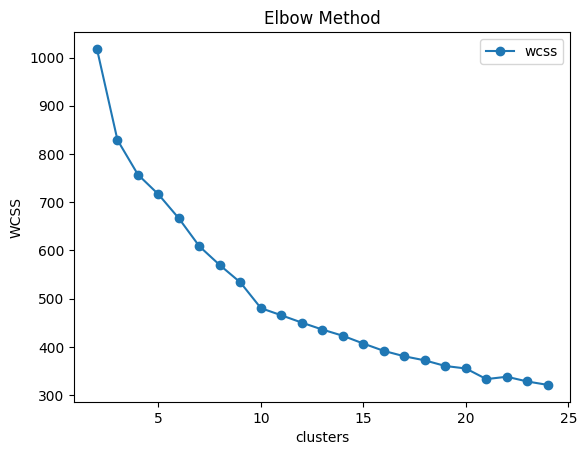

In [12]:
kmeans_scores.plot(x='clusters', y='wcss', style='-o', ylabel='WCSS', title='Elbow Method');

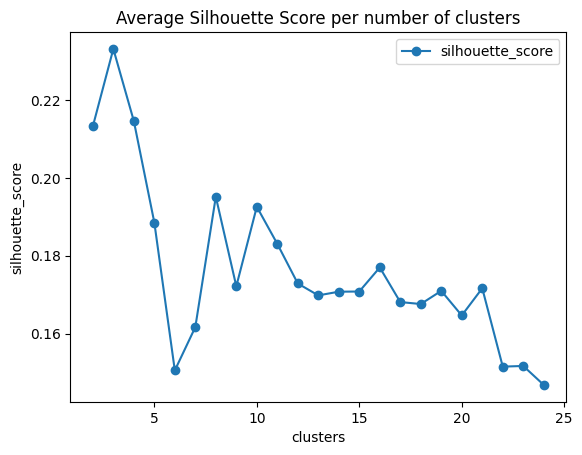

In [13]:
kmeans_scores.plot(x='clusters', y='silhouette_score', style='o-', ylabel='silhouette_score', title='Average Silhouette Score per number of clusters');

In [14]:
kmeans_scores.loc[kmeans_scores['silhouette_score'].idxmax()]

name                    KMeans
clusters                     3
silhouette_score      0.233105
wcss                829.045584
Name: 1, dtype: object

### 1.1.2 Model Evaluation

In [52]:
 # model definition
kmeans = KMeans(n_clusters=3, n_init='auto', random_state=0)

# model fit
kmeans.fit(X)

# model prediction
labels = kmeans.fit_predict(X)
labels

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 2, 0, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 2, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 2, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int32)

In [53]:
data = ['KMeans', kmeans.get_params()['n_clusters'], silhouette_score(X, labels)]

cluster_scores = update_dataframe(cluster_scores, data)
cluster_scores

Algorithm Clusters  Silhoutte Score
0    KMeans        3         0.233105

In [16]:
df['cluster'] = labels

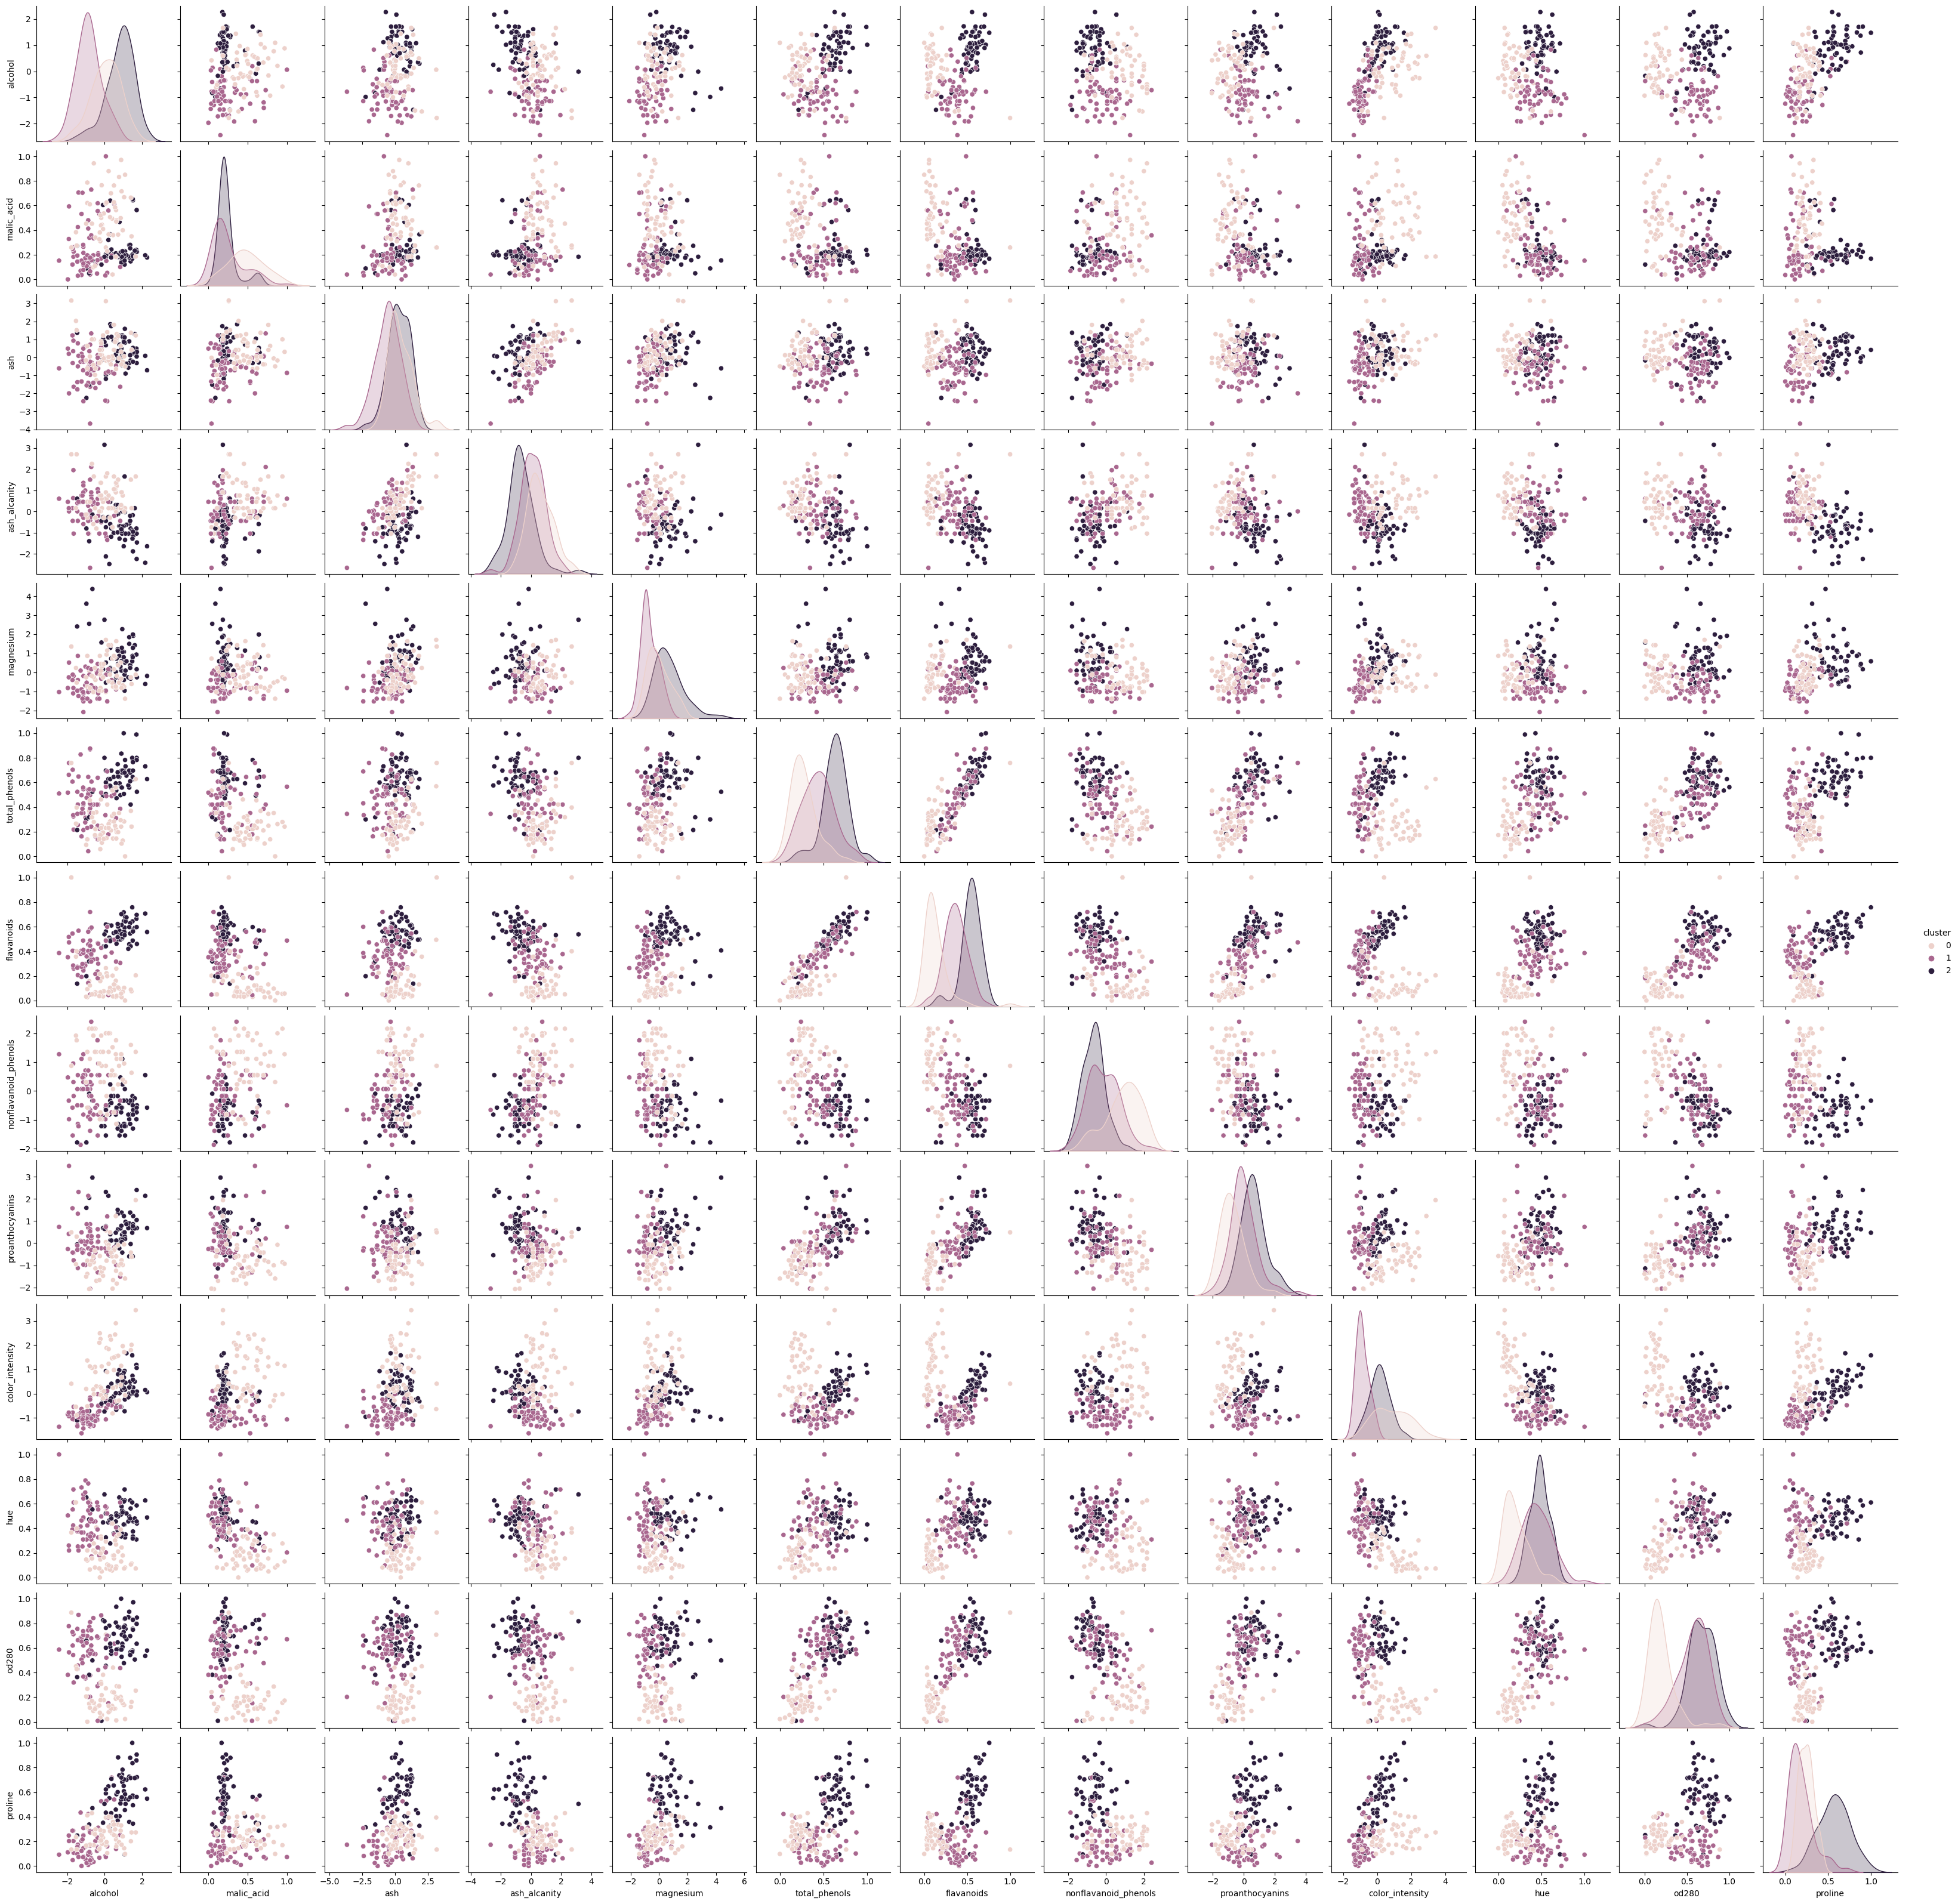

In [17]:
sns.pairplot(data=df, hue='cluster')

## 1.2 Affinity Propagation

O algoritmo Affinity Propagation, implementado pela classe `AffinityPropagation`, segmenta o conjunto de dados a partir de exemplares (pontos que melhores representam uma classe / entidade).

A determinação dos exemplares é feita através da troca de 2 tipos informações entre os pontos, em uma estrutura de grafos: 

1. **Responsabilidade**: ponto $i$ transmite aos demais pontos $j$ o quanto ele acredita que $j$ seja capaz de representá-lo.

2. **Disponibilidade**: o quanto cada ponto $i$ é convencido pelo ponto $j$ que ele é de fato um bom exemplar.

Parâmetros para se ajustar:

* `preference` (auto-responsabilidade) = indica o quanto cada ponto acredita que ele próprio é um exemplar; quanto maior o seu valor maior será o número de clusters (muitos pontos confiantes que eles são exemplares)

### 1.2.1 Fine-Tuning

In [41]:
affinity_scores = pd.DataFrame(columns=['name', 'preference', 'clusters', 'silhouette_score'])

for p in range(-200, 0, 10):
    
    # model definition
    affinity = AffinityPropagation(preference=p)

    # model fit
    affinity.fit(X)

    # model prediction
    labels = affinity.labels_
    ss = silhouette_score(X, labels)

    data = [type(affinity).__name__, p, np.unique(labels).shape[0], ss]

    affinity_scores = update_dataframe(affinity_scores, data)

In [42]:
affinity_scores

name preference clusters  silhouette_score
0   AffinityPropagation       -200        3          0.195695
1   AffinityPropagation       -190        3          0.198860
2   AffinityPropagation       -180        3          0.215123
3   AffinityPropagation       -170        3          0.198860
4   AffinityPropagation       -160        3          0.171927
5   AffinityPropagation       -150        3          0.215123
6   AffinityPropagation       -140        3          0.186184
7   AffinityPropagation       -130        3          0.171927
8   AffinityPropagation       -120        3          0.163592
9   AffinityPropagation       -110        4          0.181823
10  AffinityPropagation       -100        4          0.158776
11  AffinityPropagation        -90        5          0.152777
12  AffinityPropagation        -80        4          0.188441
13  AffinityPropagation        -70        5          0.172855
14  AffinityPropagation        -60        6          0.183181
15  AffinityPropagation        -50        7          0.202286
16  AffinityPropagation        -40        8          0.162256
17  AffinityPropagation        -30       10          0.146747
18  AffinityPropagation        -20       11          0.158947
19  AffinityPropagation        -10       25          0.171268

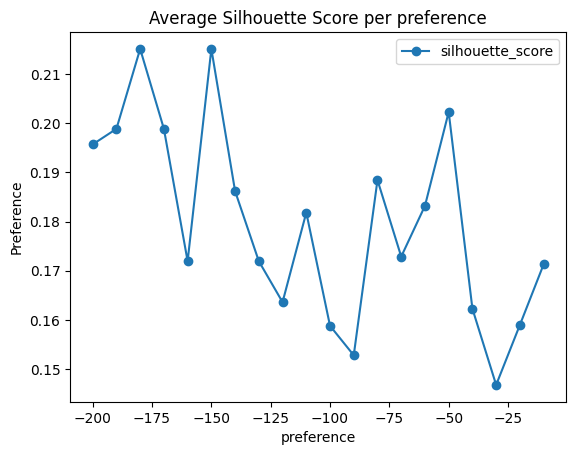

In [47]:
affinity_scores.plot(x='preference', y='silhouette_score', style='-o', ylabel='Preference', title='Average Silhouette Score per preference');

In [48]:
affinity_scores.loc[affinity_scores['silhouette_score'].idxmax()]

name                AffinityPropagation
preference                         -180
clusters                              3
silhouette_score               0.215123
Name: 2, dtype: object

### 1.2.2 Model Evaluation

In [56]:
 # model definition
affinity = AffinityPropagation(preference=-180)

# model fit
affinity.fit(X)

# model prediction
labels = affinity.labels_
labels

array([0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 2, 0, 1, 0, 1, 2, 1, 1, 0, 1, 0, 1, 1, 1, 1, 2, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 0, 2,
       2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 2])

In [57]:
data = ['AffinityPropagation', np.unique(labels).shape[0], silhouette_score(X, labels)]

cluster_scores = update_dataframe(cluster_scores, data)
cluster_scores

Algorithm Clusters  Silhoutte Score
0               KMeans        3         0.233105
1  AffinityPropagation        3         0.215123

In [58]:
df['cluster'] = affinity.labels_

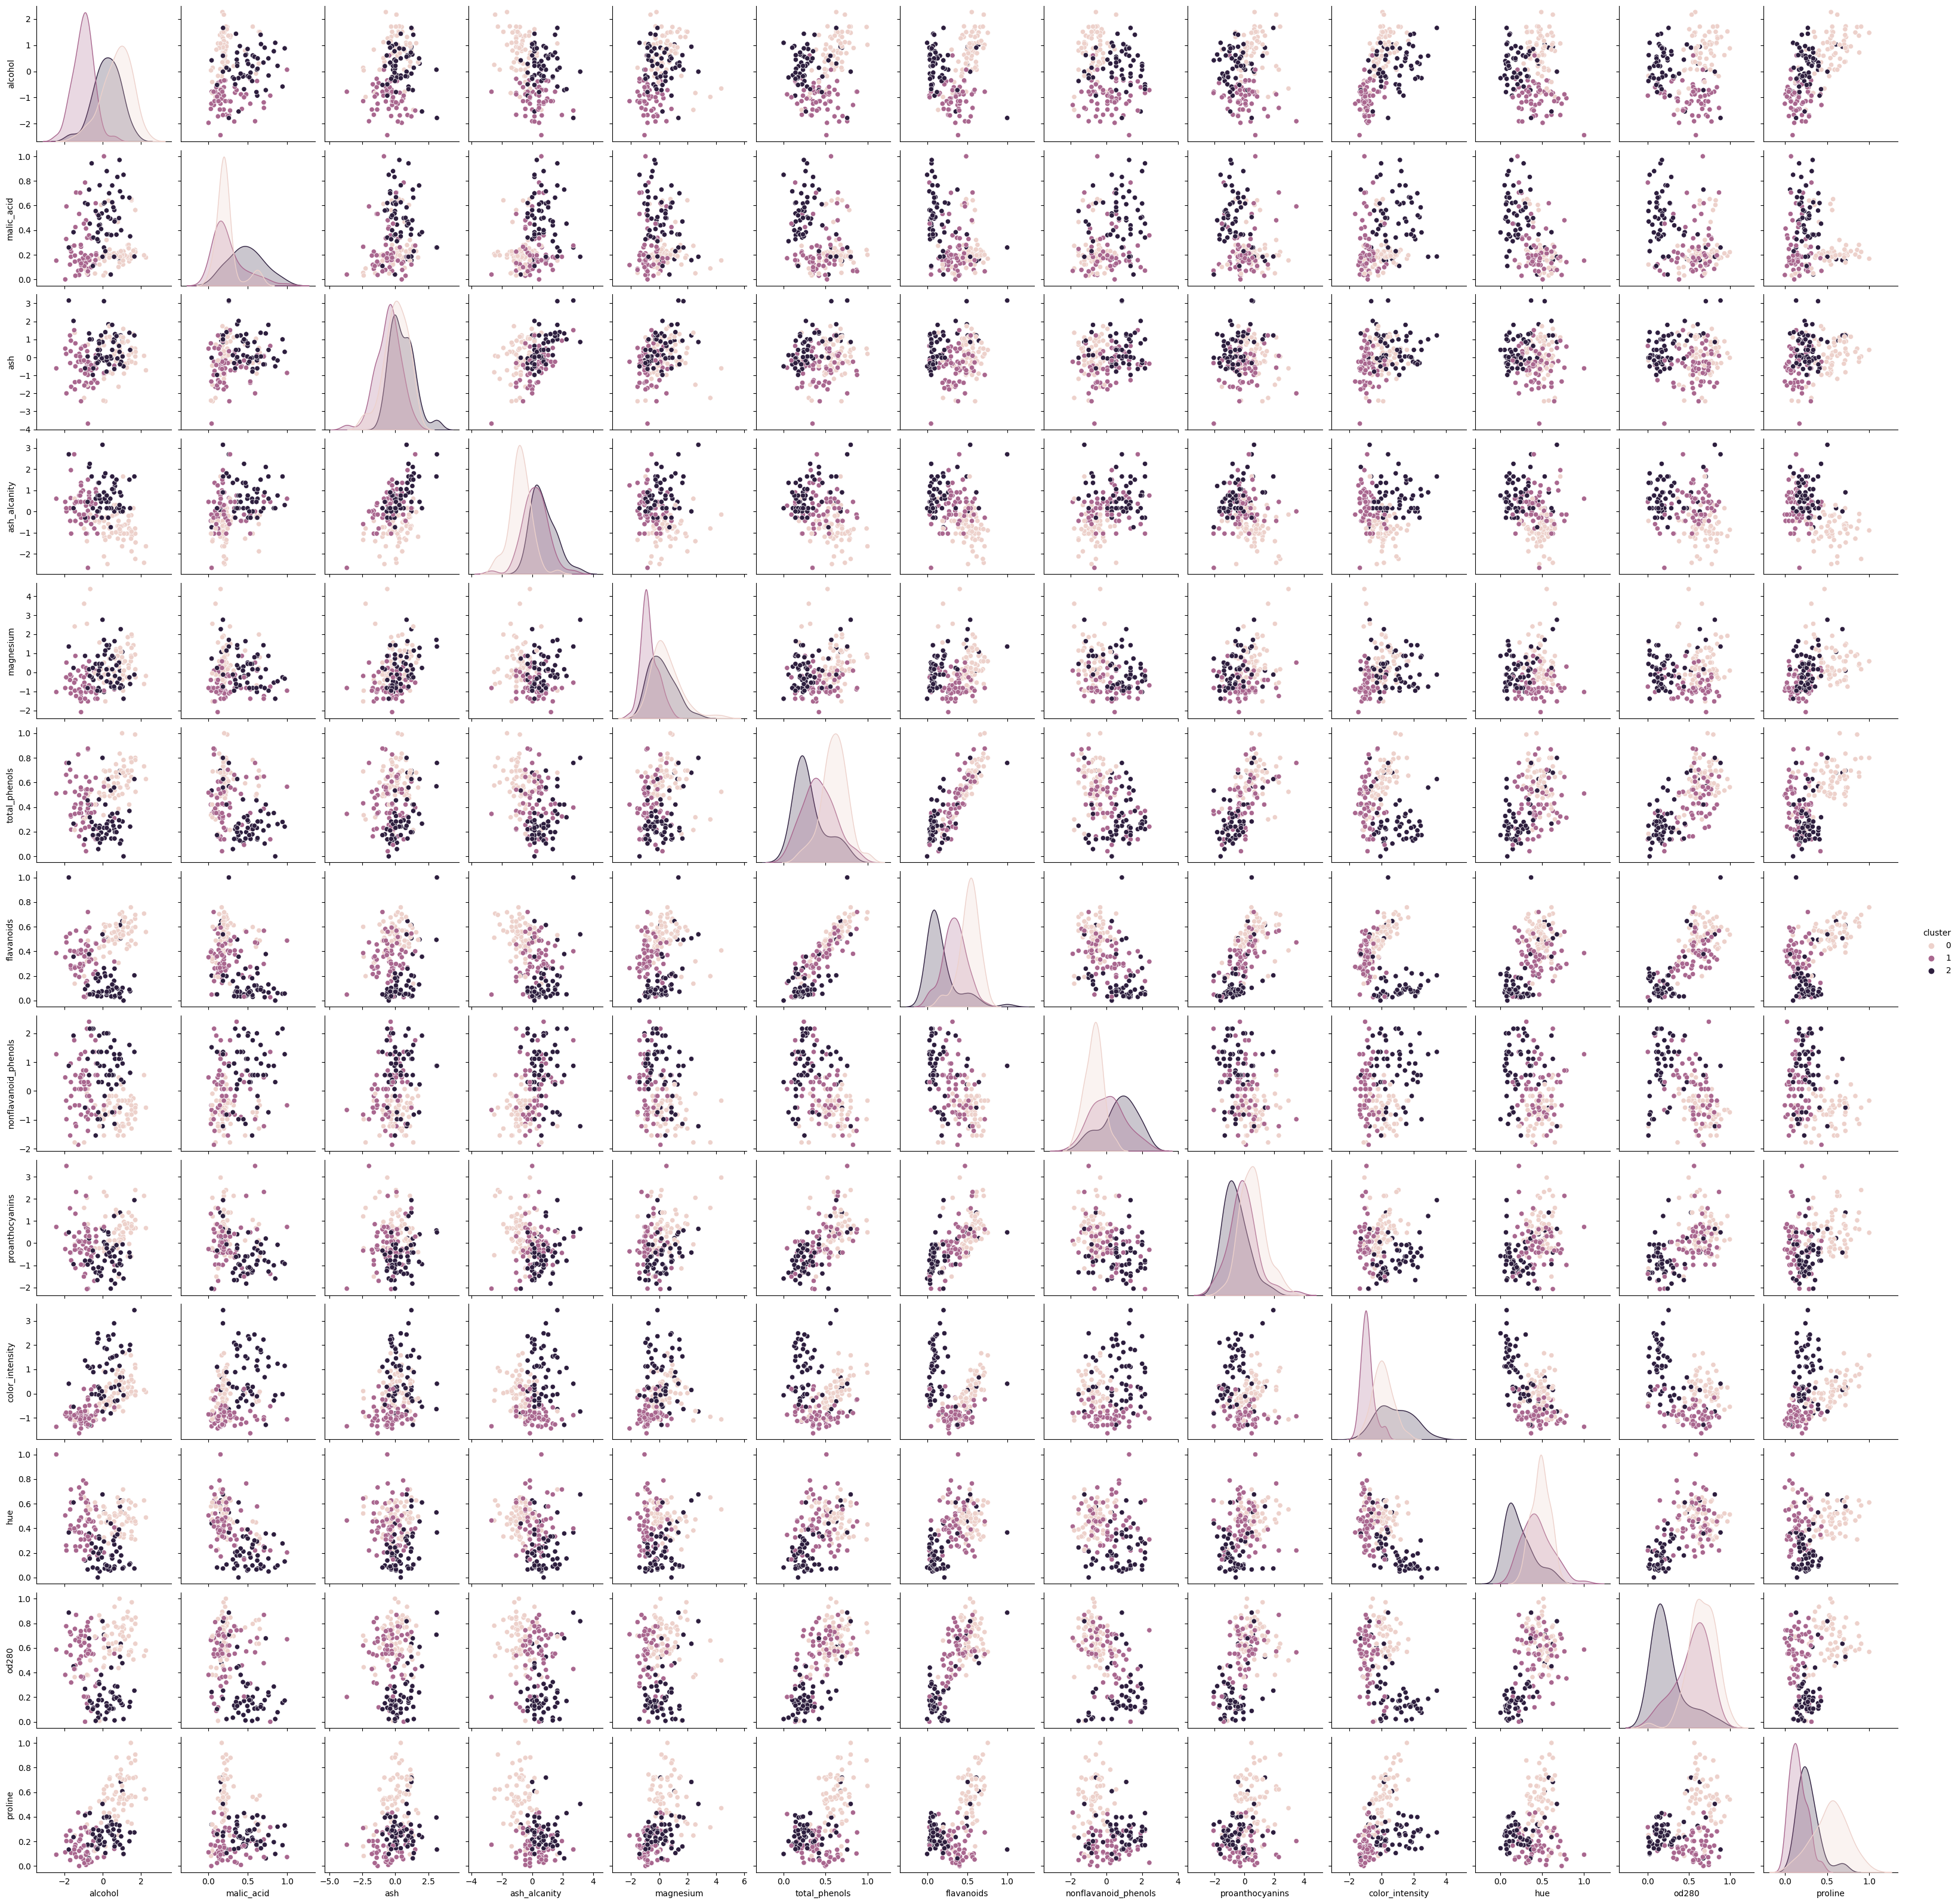

In [45]:
sns.pairplot(data=df, hue='cluster');

# 2.0 Summary

In [59]:
cluster_scores

Algorithm Clusters  Silhoutte Score
0               KMeans        3         0.233105
1  AffinityPropagation        3         0.215123